# Desafío El Seductor Canto de las Sirenas

Las sirenas endémicas que rodean la isla donde se encuentra tu celda tienen un seductor canto con el que atraen a sus machos y aseguran la persistencia de sus especie. 
Ha emigrado, solicitando refugio, una especie de sirenas de otros lares. Esta especie emite un sonido que interfiere con el canto de las sirenas endémicas. El guardián del océano va a delimitar una región para cada especie y pide tu ayuda para distribuirlas. 
Tú recibiste una base de datos (`sirenas_endemicas_y_sirenas_migrantes_historico.csv`) que el museo de historia natural te ha facilitado con características de individuos de cada especie. Recibiste también una base de datos con los individuos que el guardián va a clasificar (`sirenas_endemicas_y_sirenas_migrantes.csv`). Indica en esta última, a qué especie de sirena pertenece cada individuo.

* <a href="#exploration">Explora tus datasets.</a>
* <a href="#explica">A. Explica la idea general de tu solución con dibujos, diagramas, videos, legos, bolitas de plastilina, etc.</a>
* <a href="#implementa">B. Implementa tu modelo explicando los pasos.</a>
* <a href="#completa">C. Completa el archivo (sirenas_endemicas_y_sirenas_migrantes.csv que entregarás al guardián.</a>
* <a href="#completa">Extra</a>

<a id='exploration'></a>
## Explorar datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hist = pd.read_csv('datasets/sirenas_endemicas_y_sirenas_migrantes_historico.csv')
test = pd.read_csv('datasets/sirenas_endemicas_y_sirenas_migrantes.csv')

In [3]:
hist.head()

,v1,v2,v3,v4,especie
0,4.3,3.0,1.1,0.1,sirena_migrante
1,4.8,3.0,1.4,0.1,sirena_migrante
2,4.9,3.1,1.5,0.1,sirena_migrante
3,4.9,3.1,1.5,0.1,sirena_migrante
4,4.9,3.1,1.5,0.1,sirena_migrante


No hay valores nulos

In [4]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
v1         100 non-null float64
v2         100 non-null float64
v3         100 non-null float64
v4         100 non-null float64
especie    100 non-null object
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [5]:
hist.describe()

,v1,v2,v3,v4
count,100.000000,100.000000,100.000000,100.000000
mean,5.797000,3.196000,3.508000,1.135000
std,0.945319,0.416071,2.094229,0.919198
min,4.300000,2.200000,1.000000,0.100000
25%,5.000000,3.000000,1.500000,0.200000
50%,5.700000,3.150000,3.200000,1.000000
75%,6.500000,3.400000,5.525000,2.000000
max,7.900000,4.400000,6.900000,2.500000


Hay duplicados!

Pero no estoy seguro de que son exactamente los valores duplicados.

Tres sirenas pueden compartir valores dependiendo de que sean, Hay sirenas trillizas?.
Creo que es mejor dejar los valores.

In [6]:
hist[hist.duplicated()]

,v1,v2,v3,v4,especie
3,4.9,3.1,1.5,0.1,sirena_migrante
4,4.9,3.1,1.5,0.1,sirena_migrante
68,5.8,2.7,5.1,1.9,sirena_endemica


Balance de clases

In [7]:
hist['especie'].value_counts()

sirena_migrante    50
sirena_endemica    50
Name: especie, dtype: int64

Labels binarios

In [8]:
hist['target'] = hist['especie'].map(lambda x: 1 if x=='sirena_endemica' else 0)

In [9]:
hist.head()

,v1,v2,v3,v4,especie,target
0,4.3,3.0,1.1,0.1,sirena_migrante,0
1,4.8,3.0,1.4,0.1,sirena_migrante,0
2,4.9,3.1,1.5,0.1,sirena_migrante,0
3,4.9,3.1,1.5,0.1,sirena_migrante,0
4,4.9,3.1,1.5,0.1,sirena_migrante,0


**Comparar cada variable con el target**

Quiero ver que tanta información nos puede dar cada variable tomando en cuenta la diferencia entre clases.

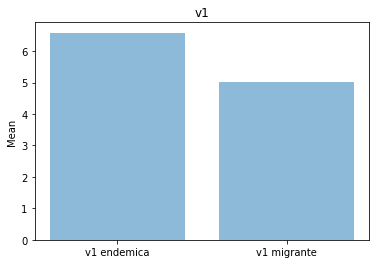

In [10]:
x1 = hist[hist['target']==1]['v1'].mean()
x2 = hist[hist['target']==0]['v1'].mean()

objects = ('v1 endemica', 'v1 migrante')
y_pos = np.arange(len(objects))
performance = [x1, x2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.title('v1')

plt.show()

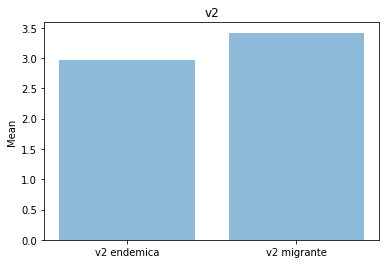

In [11]:
x1 = hist[hist['target']==1]['v2'].mean()
x2 = hist[hist['target']==0]['v2'].mean()

objects = ('v2 endemica', 'v2 migrante')
y_pos = np.arange(len(objects))
performance = [x1, x2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.title('v2')

plt.show()

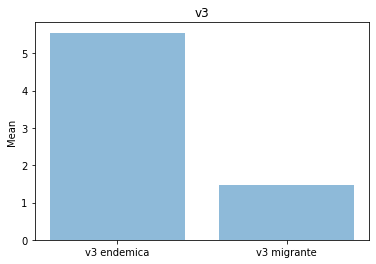

In [12]:
x1 = hist[hist['target']==1]['v3'].mean()
x2 = hist[hist['target']==0]['v3'].mean()

objects = ('v3 endemica', 'v3 migrante')
y_pos = np.arange(len(objects))
performance = [x1, x2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.title('v3')

plt.show()

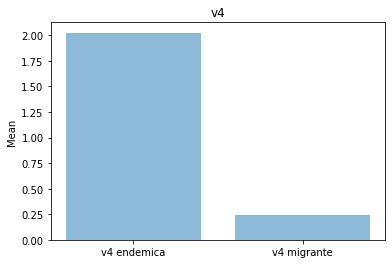

In [13]:
x1 = hist[hist['target']==1]['v4'].mean()
x2 = hist[hist['target']==0]['v4'].mean()

objects = ('v4 endemica', 'v4 migrante')
y_pos = np.arange(len(objects))
performance = [x1, x2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.title('v4')

plt.show()

Segun las tablas v4 y v3 nos ayudarán más a identificar una sirena de otra.

**Correlaciones**

Los resultados de las correlaciones coinciden con lo anterior.

Observación: V1 esta muy correlacionada con V3.

Todas en general tienen fuerte corr con el target.

In [14]:
corrs = hist[['target', 'v1', 'v2', 'v3', 'v4']].corr()
corrs.style.background_gradient(cmap='Blues')

,target,v1,v2,v3,v4
target,1,0.84097,-0.536251,0.980933,0.974207
v1,0.84097,1,-0.206766,0.904796,0.853251
v2,-0.536251,-0.206766,1,-0.478845,-0.44598
v3,0.980933,0.904796,-0.478845,1,0.96965
v4,0.974207,0.853251,-0.44598,0.96965,1


**Graficando puntos**

Parece ser un dataset muy sencillo de separar de forma lineal.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3a9e841198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3a9e765358>)

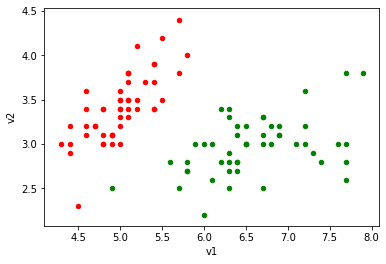

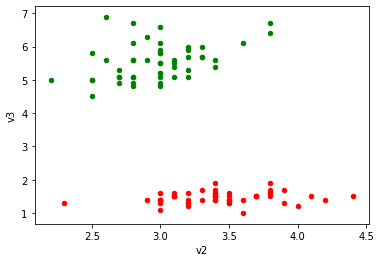

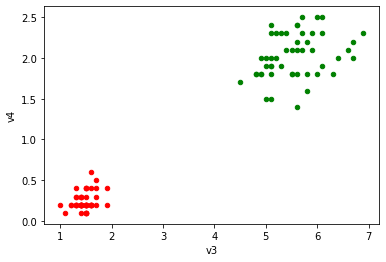

In [15]:
%matplotlib inline

ax = hist[hist['target']==1].plot.scatter(x='v1', y='v2', c='green')
ax = hist[hist['target']==0].plot.scatter(x='v1', y='v2', c='red', ax=ax)

ax2 = hist[hist['target']==1].plot.scatter(x='v2', y='v3', c='green')
ax2 = hist[hist['target']==0].plot.scatter(x='v2', y='v3', c='red', ax=ax2)

ax3 = hist[hist['target']==1].plot.scatter(x='v3', y='v4', c='green')
ax3 = hist[hist['target']==0].plot.scatter(x='v3', y='v4', c='red', ax=ax3)

ax, ax2, ax3

**Graficando con el target**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3a9e6edf28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3a9e6bdfd0>)

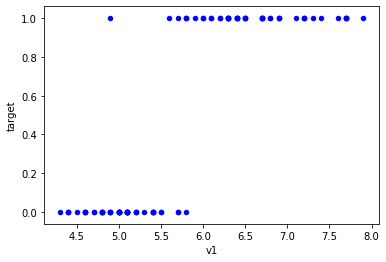

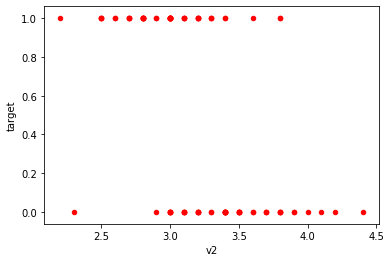

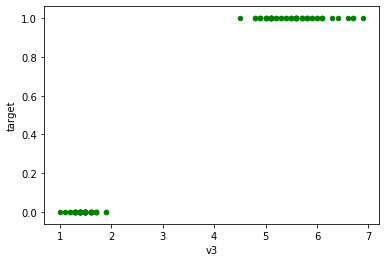

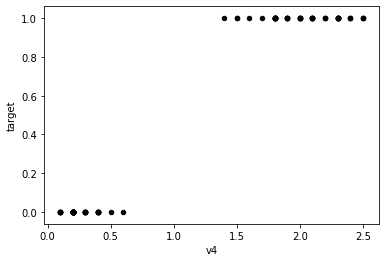

In [16]:
%matplotlib inline

ax = hist[['v1', 'target']].plot.scatter(x='v1', y='target', c='blue')

ax2 = hist[['v2', 'target']].plot.scatter(x='v2', y='target', c='red')

ax3 = hist[['v3', 'target']].plot.scatter(x='v3', y='target', c='green')

ax4 = hist[['v4', 'target']].plot.scatter(x='v4', y='target', c='black')

ax, ax2

<a id='explica'></a>
## A. Explica la idea general de tu solución con dibujos, diagramas, videos, legos, bolitas de plastilina, etc.

Me parece que fácilmente podríamos usar un SVM o una regresión logística. En realidad no veo ninguna razón para elegir un modelo u otro así que mi criterio será por el material que tengo para explicar los pasos.

La solución que usaremos será una regresión logística. 
Este método utiliza una función lineal que toma en cuenta los coeficientes de cada variable, y los resultados son transformados a valores entre 0 y 1, usando la función logit o sigmoide.

\begin{align}
&z = C_1x_1 + C_2x_2 + C_3x_3 + C_4x_4+ b \\
&Sigmoid =\frac{1}{1 + e^z} \\
\end{align}


Esta animación muestra un ejemplo de cómo cada coeficiente modifica la función:

![](https://raw.githubusercontent.com/jfreek/math_animations/master/examples/sigmoidfunc.gif)


El algoritmo busca los coeficientes tales que la función sigmoide regrese como resultado la probabilidad máxima de observar nuestros datos, o en otras palabras la función de optimización es **Maximum likelihood estimation**.

$$
L(\beta) = \prod_{j=1}^{n}(P(x_i;\beta)^{y_i})(1-P(x_i;\beta)^{1-y_i})
$$

Con un ligero cambio al agregar logaritmos por conveniencia matemática y computacional.

$$
l(\beta) = \sum_{j=1}^{n}(y_i)ln(P(x_i;\beta)) + (1-y_i)ln(1-P(x_i;\beta))
$$

### Proceso
* Estimar una primera función lineal
* Pasar función lineal por función sigmoide
* Calcular la diferencia entre mi estimación y los datos observados, de cada variable. En otras palabras la derivada. Esta derivada en realidad solo la usamos para usar el gradiente, o en otras palabras la dirección al a que queremos modificar nuestro resultado para tener un error menor.
* Actualizar coeficientes usando el gradiente y el learnign rate.
* Actualizar función lienal y sigmoide.
* Calcular MLE
* **Repetimos hasta maximizar MLE**

Esta animación muestra un ejemplo para visualizar el algoritmo ajustando la función sigmoide a nuestros datos:

![](https://raw.githubusercontent.com/jfreek/math_animations/master/examples/s_solution.gif)

Al final tenemos un modelo que nos da la probabilidad de un nuevo dato de ser de una clase o de otra. Usualmente se utiliza un threshold para decidir asignarle un valor discreto de 0 o 1.

<a id='implementa'></a>
## B. Implementa tu modelo explicando los pasos.

**Inicializando parametros del modelo**

In [17]:
X_train = hist.drop(["target", "especie"], axis=1)
Y_train = hist["target"]

lr = 0.01
num_iter = 30000
fit_intercept = True
verbose = 10000

**Creamos nuestras funciones Sigmoide y de MLE**

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mle(h, y):
    return (y * np.log(h) + (1 - y) * np.log(1 - h)).sum()

**funciones para estimar probabilidades y estimar valores discretos**

Nota: Al hacer el `round`, usamos un threshold de 0.5.

In [19]:
def predict_prob(X):
    if fit_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
    return sigmoid(np.dot(X, coeffs))

def predict(X):
    return predict_prob(X).round()

In [20]:
# agregar interseccion en su caso
if fit_intercept:
    intercept = np.ones((X_train.shape[0], 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    
# inicializamos coeficientes en 0
coeffs = np.zeros(X_train.shape[1])

# iteramos con los datos, repetimos el proceso hasta llegar al error minimo.
for i in range(num_iter):
    # funcion linear
    z = np.dot(X_train, coeffs)
    # funcion linear pasando por sigmoid
    h = sigmoid(z)
    # calculo de gradiente
    gradient = np.dot(X_train.T, (h - Y_train)) / Y_train.size
    # actualizando coeficientes, moviendolos un poco en direccion del gradiente
    coeffs -= lr * gradient
    
    # actualizando funcion linear con nuevos coeficientes
    z = np.dot(X_train, coeffs)
    # pasando fucion por sigmoid
    h = sigmoid(z)
    # calculando mle
    loss = mle(h, Y_train)
    # imprimir resultados mle
    if(verbose and i % verbose == 0):
        print(f'loss: {loss} \t')

loss: -67.9588556520177 	
loss: -0.3889944460165427 	
loss: -0.19808407395809172 	


<a id='completa'></a>
## C. Completa el archivo (sirenas_endemicas_y_sirenas_migrantes.csv que entregarás al guardián.

In [23]:
# valores de datos sin clasificar
new = test.drop('especie', axis=1).values
# calculando clases
predictions = predict(new)
# asignar resultados
test['especie'] = predictions

In [24]:
# guardar en csv
test.to_csv('soluciones/sirenas_endemicas_y_sirenas_migrantes.csv')

<a id='extra'></a>
## Extra: usando sklearn 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X_train = hist.drop(["target", "especie"], axis=1)
Y_train = hist["target"]

In [26]:
logreg = LogisticRegression(solver='liblinear')
scores = cross_validate(logreg, X_train, Y_train, cv=10, 
                        scoring=['accuracy', 'f1_macro'], return_train_score=True)

print("Train accuracy:", scores['train_accuracy'].mean())
print("Test accuracy:", scores['test_accuracy'].mean())

print("Train f1_macro:", scores['train_f1_macro'].mean())
print("Test f1_macro:", scores['test_f1_macro'].mean())

Train accuracy: 1.0
Test accuracy: 1.0
Train f1_macro: 1.0
Test f1_macro: 1.0


In [27]:
# fit
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Comparando sklearn con nuestro modelo

Porcentaje de estimaciones iguales entre los dos modelos.

In [28]:
skl_preds = logreg.predict(new)
print('comparacion = '+str((skl_preds == predictions).mean()*100)+'%')

comparacion = 100.0%


![](https://media.giphy.com/media/XreQmk7ETCak0/giphy.gif)